<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터

In [28]:
import pandas as pd
df_news = pd.read_excel('IT News.xlsx', sheet_name=None)



In [29]:
df_sheets = []
for sheet_name, df in df_news.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2024-01-31, <class 'pandas.core.frame.DataFrame'>
2024-01-30, <class 'pandas.core.frame.DataFrame'>
2024-01-29, <class 'pandas.core.frame.DataFrame'>
2024-01-26, <class 'pandas.core.frame.DataFrame'>
2024-01-25, <class 'pandas.core.frame.DataFrame'>
2024-01-24, <class 'pandas.core.frame.DataFrame'>
2024-01-23, <class 'pandas.core.frame.DataFrame'>
2024-01-22, <class 'pandas.core.frame.DataFrame'>
2024-1-19, <class 'pandas.core.frame.DataFrame'>
2024-1-18, <class 'pandas.core.frame.DataFrame'>
2024-1-17, <class 'pandas.core.frame.DataFrame'>
2024-1-16, <class 'pandas.core.frame.DataFrame'>
2024-1-15, <class 'pandas.core.frame.DataFrame'>
2024-1-12, <class 'pandas.core.frame.DataFrame'>
2024-1-11, <class 'pandas.core.frame.DataFrame'>
2024-1-10, <class 'pandas.core.frame.DataFrame'>
2024-1-9, <class 'pandas.core.frame.DataFrame'>
2024-1-8, <class 'pandas.core.frame.DataFrame'>
2024-1-5, <class 'pandas.core.frame.DataFrame'>
2024-1-4, <class 'pandas.core.frame.DataFrame'>
2024-01-03, <cla

45

In [30]:
df_sheets[0].columns[0]

'이름'

In [ ]:
# 이름으로 컬럼이름 통일
for x in df_sheets :
  if x.columns[0] != '이름' :
    x.rename(columns = {f'{x.columns[0]}':'이름'}, inplace=True)
    pass
df_sheets

In [114]:
# 내가 작성한 뉴스명 기준
# sentences = []
# for sheet in df_sheets:
#   try:
#     sentences.append(sheet.query("이름=='오지수'")['뉴스명'].dropna().values[0])
#   except:
#     pass
#   pass
# sentences


# 전체 뉴스명 기준
sentences = []
for sheet in df_sheets:
  for x in sheet['뉴스명'].dropna().values :
    try:
      sentences.append(x)
    except:
      pass
  pass
sentences

['개보위 "맞춤형 광고 개인정보 처리 투명성 높인다"',
 '카카오쇼핑 모바일 교환권, 삼성페이에서 쓴다',
 'AI로 인간추론능력 40% 높였다',
 '인간 뇌조직으로 컴퓨터 구축 성공',
 "주담대 갈아타기 대박 낸 네이버·카카오페이 '전월세대출 갈아타기' 출시",
 '"쇼핑몰 매장·화장실 위치 한눈에"…카카오맵, 실내지도 서비스',
 '뇌 안에 컴퓨터 있다... 머스크의 ‘뉴럴링크’, 칩 이식 성공',
 '중고거래 플랫폼 구입 에어프라이어, 불량인데 판매자 연락도 안된다?',
 '음악가 71% "AI로 생계 잃을 것" 우려…작사·작곡에는 활용',
 '내 콘텐츠로 무단학습하는 AI… 그림에 `독`타서 저작권 지킨다',
 '정보공개청구, 이제 AI가 돕는다…내용요약·처리방향까지 ‘척척’',
 '가우디오랩, AI 소음제거 기술 SXSW 혁신상에 올라',
 '[혁신스타트업 in 홍릉] 픽셀로 “눈 건강 관리, 안구 질환 예방하는 아이케어 솔루션”',
 '구글의 야망과 휴머노이드 시스템 ‘모바일 알로하’',
 '전원 켜진 日 달 탐사선 슬림, 암석 촬영 성공',
 "공정위, 플랫폼법 제정 속도...업계 '경쟁력 약화' 우려 고조",
 '"건강검진 사라진다"…삼성·애플도 경쟁하는 웨어러블 헬스케어[미래on]',
 '머스크의 뉴럴링크, 최초로 인간 뇌에 칩 이식…"첫 제품은 텔레파시"',
 '아이돌 챗봇으로 팬심 저격하는 넷마블',
 'NYT "챗GPT는 저작권 도둑"… 오픈AI·MS에 저작권 소송',
 'China approves over 40 AI mod-\nels for public use in six months',
 'AI로 난소암 확인하는 기술 개발',
 '테슬라, 해킹 대회서 또 뚫렸다',
 '올해 바이오 3대 핵심 "AI·비만치료제·ADC"',
 '‘스위프트 딥페이크’에 발칵... “MS의 AI가 만들고, X 통해 퍼졌다”',
 '돌봄로봇이 협심증으로 쓰러진 70대 입주민 신고해 구조',
 '"변곡점 왔지만 갈 길 멀다" 2024년 AR/VR 시장 전

In [115]:
!pip install konlpy

In [116]:
# Okt 사용
from konlpy.tag import Okt
okt = Okt()

In [117]:
# 조사, 어미, 구두점, URL 제거
import re
def okt_clean(sentences):
  sentence_list = []
  for sentence in sentences :
    clean_text = []
    for word in okt.pos(sentence, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation','URL']:
            clean_text.append(word[0])
            pass
    sentence_list.append(" ".join(clean_text))
  return sentence_list

In [118]:
sentences_list = okt_clean(sentences)
sentences_list

['개 보위 맞춤 형 광고 개인정보 처리 투명 성 높이다',
 '카카오 쇼핑 모바일 교환 권 삼 성 페이 쓴다',
 'AI 로 인간 추론 능력 40% 높이다',
 '인간 뇌 조직 컴퓨터 구축 성공',
 '주 담대 갈아타다 대박 내다 네이버 카카오 페이 전월세 대출 갈아타다 출시',
 '쇼핑몰 매장 화장실 위치 한눈 카카오 맵 실내 지도 서비스',
 '뇌 안 컴퓨터 있다 머스크 ‘ 뉴럴 링크 칩 이식 성공',
 '중고 거래 플랫폼 구입 에어 프라이어 불량 판매 자 연락 안되다',
 '음악가 71% AI 로 생계 잃다 것 우려 작사 작곡 활용',
 '내 콘텐츠 무단 학습 하 AI 그림 독 타다 저작권 지키다',
 '정보공개 청구 이제 AI 가다 돕다 내용 요약 처리 방향 ‘ 척척',
 '가우디 오 랩 AI 소음 제거 기술 SXSW 혁신 상 오르다',
 '혁신 스타트업 in 홍릉 픽셀 “ 눈 건강 관리 안구 질환 예방 하다 아이 케어 솔루션 ”',
 '구글 야망 휴머노이드 시스템 ‘ 모바일 알로하',
 '전원 켜지다 日 달 탐사선 슬림 암석 촬영 성공',
 '공정위 플랫폼 법 제정 속도 업계 경쟁력 약화 우려 고조',
 '건강검진 사라지다 삼성 애플 경쟁 하다 웨어 러블 헬 스케 어 미래 on',
 '머스크 뉴럴 링크 최초 인간 뇌 칩 이식 첫 제품 텔레파시',
 '아이돌 챗봇 팬심 저격 하다 넷마블',
 'NYT 챗 GPT 늘다 저작권 도둑 오픈 AI MS 저작권 소송',
 'China approves over 40 AI mod \n els for public use in six months',
 'AI 로 난소암 확인 하다 기술 개발',
 '테슬라 해킹 대회 또 뚫리다',
 '올해 바이오 3 대다 핵심 AI 비만 치료 제 ADC',
 '‘ 스위프트 딥 페이크 발칵 “ MS 의 AI 가다 만들다 X 통해 퍼지다 ”',
 '돌보다 로봇 협심증 쓰러지다 70 대다 입 주민 신고 하다 구조',
 '변곡점 오다 갈다 길 멀다 2024년 AR VR 시장 전망',
 'KT 

## 모델

In [119]:
file_path = 'tfidfVectorizer.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_vector = pickle.load(pickle_file)

In [120]:
# Tokenizing
sentence_tokens = loaded_model_vector.transform(sentences_list) # 학습 형식 그대로 이용
sentence_tokens

<328x27288 sparse matrix of type '<class 'numpy.float64'>'
	with 2405 stored elements in Compressed Sparse Row format>

In [121]:
file_path = 'NLP_classfication_ynanewstitles.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_cate = pickle.load(pickle_file)

In [122]:
# 예측
predict_cate = loaded_model_cate.predict(sentence_tokens.toarray())
predict_cate

array([2., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 1., 3., 0., 0., 0., 0., 2., 0., 3., 0., 1., 0., 0., 0., 1.,
       2., 0., 2., 0., 0., 2., 3., 0., 0., 0., 0., 0., 4., 2., 2., 2., 2.,
       0., 2., 1., 0., 3., 0., 1., 1., 0., 6., 2., 2., 0., 0., 1., 0., 3.,
       0., 4., 0., 0., 0., 0., 0., 0., 4., 3., 0., 0., 1., 1., 0., 0., 0.,
       0., 2., 1., 0., 2., 0., 0., 4., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 1., 0., 0., 0., 2., 0., 1.,
       0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 1., 0.,
       4., 0., 0., 0., 3., 2., 0., 0., 0., 0., 2., 0., 0., 0., 1., 3., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       2., 0., 2., 0., 0., 0., 2., 1., 0., 0., 6., 0., 0., 0., 2., 0., 2.,
       0., 4., 4., 0., 0., 0., 6., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       2., 6., 2., 0., 0.

In [123]:
df_topic = pd.read_csv('topic_dict.csv')
df_topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [124]:
predict_topic = []
for x in predict_cate :
  topic = df_topic.query(f"topic_idx=={x}")['topic'].values[0]
  predict_topic.append(topic)
predict_topic

['사회',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 '생활문화',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 '생활문화',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 '사회',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 '사회',
 '생활문화',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '세계',
 '사회',
 '사회',
 '사회',
 '사회',
 'IT과학',
 '사회',
 '경제',
 'IT과학',
 '생활문화',
 'IT과학',
 '경제',
 '경제',
 'IT과학',
 '정치',
 '사회',
 '사회',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 '생활문화',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '세계',
 '생활문화',
 'IT과학',
 'IT과학',
 '경제',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 '경제',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 

In [125]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [126]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [127]:
from collections import Counter
noun_count = Counter(predict_topic)
noun_count

Counter({'사회': 51, 'IT과학': 221, '경제': 28, '생활문화': 13, '세계': 10, '정치': 5})

## WordCloud

In [128]:
wordCloud.generate_from_frequencies(noun_count)

In [129]:
wordCloud.words_

{'IT과학': 1.0,
 '사회': 0.23076923076923078,
 '경제': 0.12669683257918551,
 '생활문화': 0.058823529411764705,
 '세계': 0.04524886877828054,
 '정치': 0.02262443438914027}

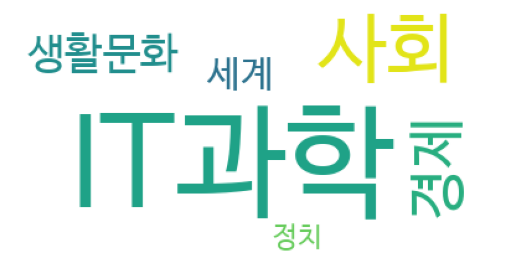

In [130]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()